In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

ModuleNotFoundError: No module named 'citipy'

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=03069a1e2eb77d2fcc3c03de41c7f9af


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 5 == 0 and i >= 5):
        #set_count += 1
        #record_count = 1
        #time.sleep(6)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | toliary
City not found. Skipping...
Processing Record 4 of Set 1 | prince rupert
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | mabaruma
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | shillong
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | nalut
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | olds
Processing Record 22 of Set 1 | bolshaya martynovka
Processing Record 23 of 

Processing Record 35 of Set 4 | souillac
Processing Record 36 of Set 4 | zachagansk
City not found. Skipping...
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | takoradi
Processing Record 39 of Set 4 | jambi
Processing Record 40 of Set 4 | atar
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | chimbote
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | san miguel
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | dedovichi
Processing Record 50 of Set 4 | zyryanka
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | sriperumbudur
Processing Record 3 of Set 5 | iquique
Processing Record 4 of Set 5 | jalu
Processing Record 5 of Set 5 | artyom
Processing Record 6 of Set 5 | sakhipur
Processing Record 7 of Set 5 | barbar
City not found. Skipping...
Processing R

Processing Record 27 of Set 8 | pangnirtung
Processing Record 28 of Set 8 | coahuayana
Processing Record 29 of Set 8 | henties bay
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | ostrovnoy
Processing Record 32 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | agadir
Processing Record 35 of Set 8 | luyang
Processing Record 36 of Set 8 | hvammstangi
City not found. Skipping...
Processing Record 37 of Set 8 | povoa de varzim
Processing Record 38 of Set 8 | burns lake
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 41 of Set 8 | contamana
Processing Record 42 of Set 8 | curup
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | les cayes
Proc

Processing Record 16 of Set 12 | kindu
Processing Record 17 of Set 12 | traralgon
Processing Record 18 of Set 12 | utiroa
City not found. Skipping...
Processing Record 19 of Set 12 | port-gentil
Processing Record 20 of Set 12 | trairi
Processing Record 21 of Set 12 | severo-yeniseyskiy
Processing Record 22 of Set 12 | hlotse
Processing Record 23 of Set 12 | alyangula
Processing Record 24 of Set 12 | lavrentiya
Processing Record 25 of Set 12 | daniel flores
Processing Record 26 of Set 12 | senanga
Processing Record 27 of Set 12 | port hardy
Processing Record 28 of Set 12 | ninghai
Processing Record 29 of Set 12 | taiyuan
Processing Record 30 of Set 12 | barguzin
Processing Record 31 of Set 12 | hamilton
Processing Record 32 of Set 12 | brae
Processing Record 33 of Set 12 | grudziadz
Processing Record 34 of Set 12 | warmbad
Processing Record 35 of Set 12 | san quintin
Processing Record 36 of Set 12 | brownsville
Processing Record 37 of Set 12 | tahta
Processing Record 38 of Set 12 | barc

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,28.29,97,59,2.86,RU,2022-04-02 00:46:57
1,Provideniya,64.3833,-173.3000,27.97,79,100,11.05,RU,2022-04-02 00:43:35
2,Prince Rupert,54.3161,-130.3201,42.89,81,100,5.75,CA,2022-04-02 00:46:58
3,Punta Arenas,-53.1500,-70.9167,39.31,81,0,5.75,CL,2022-04-02 00:46:58
4,New Norfolk,-42.7826,147.0587,58.91,60,100,4.00,AU,2022-04-02 00:43:50
5,Mabaruma,8.2000,-59.7833,70.93,88,100,3.60,GY,2022-04-02 00:46:59
6,Mataura,-46.1927,168.8643,62.29,54,6,6.78,NZ,2022-04-02 00:46:59
7,Port Alfred,-33.5906,26.8910,62.19,97,100,8.14,ZA,2022-04-02 00:43:38
8,Shillong,25.5689,91.8831,61.14,84,7,2.37,IN,2022-04-02 00:47:00
9,Butaritari,3.0707,172.7902,82.26,72,12,21.59,KI,2022-04-02 00:47:00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


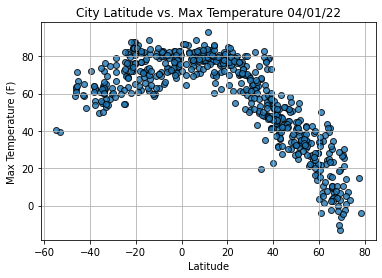

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


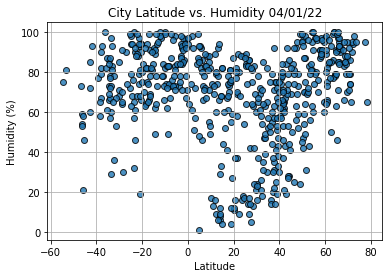

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

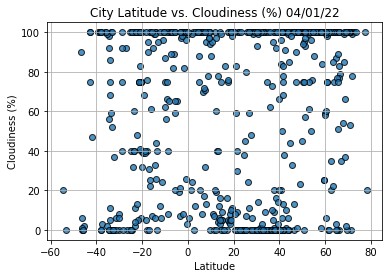

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

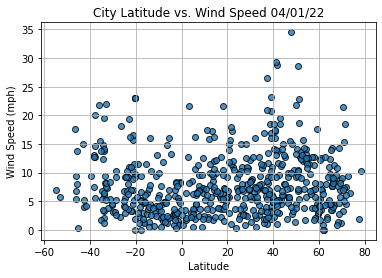

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
index13

City                     Cidreira
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    63.03
Humidity                       68
Cloudiness                      8
Wind Speed                   4.43
Country                        BR
Date          2022-04-02 00:47:02
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,28.29,97,59,2.86,RU,2022-04-02 00:46:57
1,Provideniya,64.3833,-173.3000,27.97,79,100,11.05,RU,2022-04-02 00:43:35
2,Prince Rupert,54.3161,-130.3201,42.89,81,100,5.75,CA,2022-04-02 00:46:58
5,Mabaruma,8.2000,-59.7833,70.93,88,100,3.60,GY,2022-04-02 00:46:59
8,Shillong,25.5689,91.8831,61.14,84,7,2.37,IN,2022-04-02 00:47:00
...,...,...,...,...,...,...,...,...,...
573,Sakakah,29.9697,40.2064,67.05,16,100,8.34,SA,2022-04-02 01:02:51
574,Ust-Ilimsk,58.0006,102.6619,26.20,89,100,1.74,RU,2022-04-02 01:02:51
575,Almaznyy,48.0448,40.0450,55.33,59,100,9.89,RU,2022-04-02 01:02:51
576,Binzhou,37.3667,118.0167,52.23,37,95,3.11,CN,2022-04-02 01:02:52


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,28.29,97,59,2.86,RU,2022-04-02 00:46:57
1,Provideniya,64.3833,-173.3000,27.97,79,100,11.05,RU,2022-04-02 00:43:35
2,Prince Rupert,54.3161,-130.3201,42.89,81,100,5.75,CA,2022-04-02 00:46:58
5,Mabaruma,8.2000,-59.7833,70.93,88,100,3.60,GY,2022-04-02 00:46:59
8,Shillong,25.5689,91.8831,61.14,84,7,2.37,IN,2022-04-02 00:47:00


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

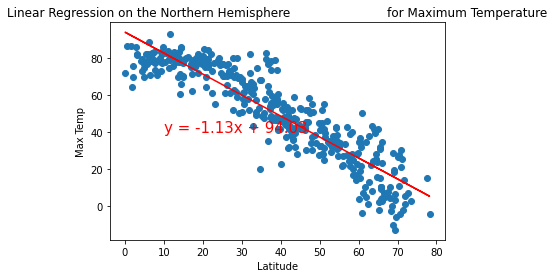

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

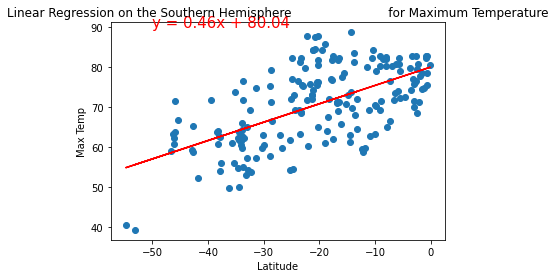

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

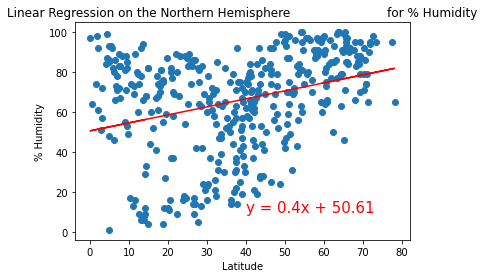

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

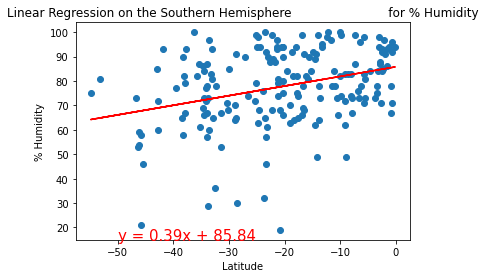

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

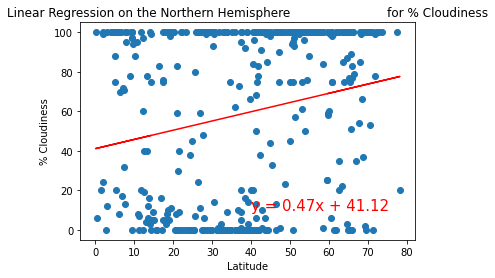

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

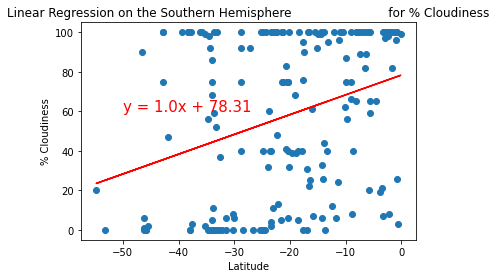

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

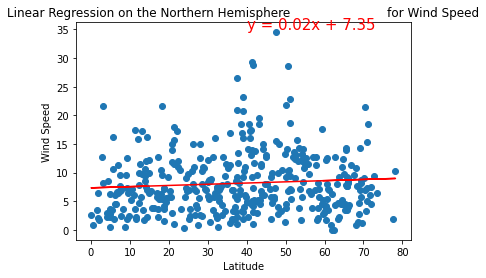

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

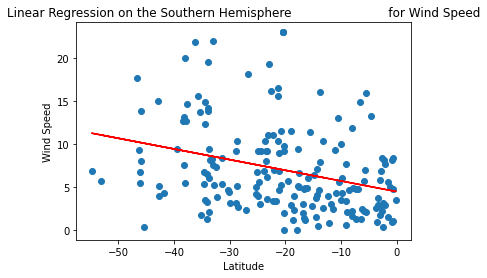

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))